A pivot table is a similar operation that is commonly seen in spreadsheets and 
other programs that operate on tabular data. The pivot table takes simple 
column-wise data as input, and groups the entries into a two-dimensional table that provides 
a multidimensional summarization of the data.

This tool enabled users to automatically sort, count, total, or average the data stored in one table

In [1]:
##Create a Pivot Table in Python using Pandas



from pandas import DataFrame

Employees = {'Name of Employee': ['Jon','Mark','Tina','Maria','Bill','Jon','Mark','Tina','Maria','Bill','Jon','Mark','Tina','Maria','Bill','Jon','Mark','Tina','Maria','Bill'],
             'Sales': [1000,300,400,500,800,1000,500,700,50,60,1000,900,750,200,300,1000,900,250,750,50],
             'Quarter': [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4],
             'Country': ['US','Japan','Brazil','UK','US','Brazil','Japan','Brazil','US','US','US','Japan','Brazil','UK','Brazil','Japan','Japan','Brazil','UK','US']
            }

df = DataFrame(Employees, columns= ['Name of Employee', 'Sales','Quarter','Country'])

print (df)

   Name of Employee  Sales  Quarter Country
0               Jon   1000        1      US
1              Mark    300        1   Japan
2              Tina    400        1  Brazil
3             Maria    500        1      UK
4              Bill    800        1      US
5               Jon   1000        2  Brazil
6              Mark    500        2   Japan
7              Tina    700        2  Brazil
8             Maria     50        2      US
9              Bill     60        2      US
10              Jon   1000        3      US
11             Mark    900        3   Japan
12             Tina    750        3  Brazil
13            Maria    200        3      UK
14             Bill    300        3  Brazil
15              Jon   1000        4   Japan
16             Mark    900        4   Japan
17             Tina    250        4  Brazil
18            Maria    750        4      UK
19             Bill     50        4      US


## Our goal is to determine the:

- Total sales per employee
- Total sales by country
- Sales by both employee and country
- Max individual sale by country
- Mean, median and min sales by country

In [3]:
##Total sales per employee

pvs = df.pivot_table(index=['Name of Employee'], values=['Sales'], aggfunc='sum')

print (pvs)

                  Sales
Name of Employee       
Bill               1210
Jon                4000
Maria              1500
Mark               2600
Tina               2100


In [4]:
##Total sales by country

pvs2 = df.pivot_table(index=['Country'], values=['Sales'], aggfunc='sum')

print (pvs2)

         Sales
Country       
Brazil    3400
Japan     3600
UK        1450
US        2960


<AxesSubplot:xlabel='Country'>

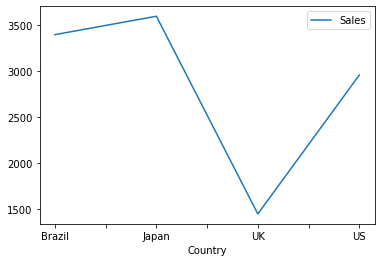

In [5]:
#But what if you want to plot these results?

#You can easily do that by adding ‘.plot()’ at the end of the ‘pivot’ variable:



pv = df.pivot_table(index=['Country'], values=['Sales'], aggfunc='sum').plot()
pv
##print (pv.show())

## The plots
## You can tell Pandas (and through it the matplotlib package that actually does the plotting) 
what xticks you want explicitly:

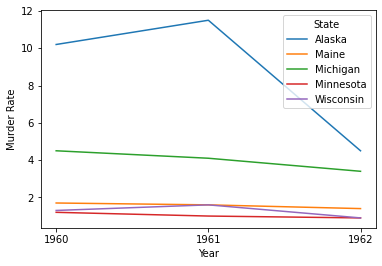

In [6]:
import numpy as np
import pandas as pd

control_1960_to_1962 = pd.DataFrame({
    'State': np.repeat(['Alaska', 'Maine', 'Michigan', 'Minnesota', 'Wisconsin'], 3),
    'Year': [1960, 1961, 1962]*5,
    'Murder Rate': [10.2, 11.5, 4.5, 1.7, 1.6, 1.4, 4.5, 4.1, 3.4, 1.2, 1.0, .9, 1.3, 1.6, .9]
})

df = control_1960_to_1962.pivot(index='Year', columns='State', values='Murder Rate')
ax = df.plot(xticks=df.index)
ylab = ax.set_ylabel('Murder Rate')

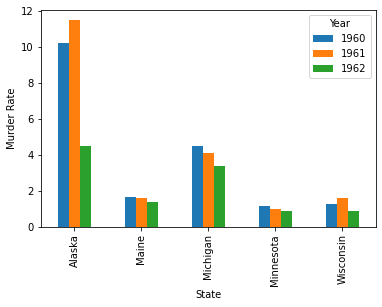

In [7]:
#ax is a matplotlib.axes.Axes object, and there are many, many customizations you can make to your plot through it.

#Here's how to plot with the States on the x axis:

ax = df.T.plot(kind='bar')
ylab = ax.set_ylabel('Murder Rate')

# Using the World Happiness Report Dataset ( year 2015)

In [12]:
import pandas as pd
import numpy as np
# reading the data
data = pd.read_csv('../datasets/whr/2015.csv', index_col=0)
data
# sort the df by ascending years and descending happiness scores
data.sort_values(["Happiness Score"], ascending=[False], inplace=True)
#diplay first 10 rows
data.head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [ ]:
Each country’s Happiness Score is calculated by summing the seven other variables in
the table. Each of these variables reveals a population-weighted average score on a 
scale running from 0 to 10, that is tracked over time and compared against other countries.

These variables are:

Economy: real GDP per capita
Family: social support
Health: healthy life expectancy
Freedom: freedom to make life choices
Trust: perceptions of corruption
Generosity: perceptions of generosity
Dystopia: each country is compared against a hypothetical nation that represents
    the lowest national averages for each key variable and is, along with residual 
    error, used as a regression benchmark
Each country’s Happiness Score determines its Happiness Rank – which is its relative
position among other countries in that specific year. For example, the first row
indicates that Switzerland was ranked the happiest country in 2015 with a happiness
score of 7.587. Switzerland was ranked first just before Iceland, which scored 7.561.
Denmark was ranked third in 2015, and so on. It’s interesting to note that Western
Europe took seven of the top eight rankings in 2015.

In [13]:
# getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0], data.shape[1]))
# checking for missing values
print("Are there missing values? {}".format(data.isnull().any().any()))
data.describe()

Our data has 158 rows and 11 columns
Are there missing values? False


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
The describe() method reveals that Happiness Rank ranges from 1 to 158, (min and max values )
which means that the largest number of surveyed countries for a given year was 158.
It’s worth noting that Happiness Rank was originally of type int. 

In [13]:
##Categorizing the data by Year and Region
pd.pivot_table(data, index= 'Year', values= "Happiness Score")

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [14]:
pd.pivot_table(data, index = 'Region', values="Happiness Score")

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [15]:
#Creating a multi-index pivot table
pd.pivot_table(data, index = ['Region', 'Year'], values="Happiness Score")



Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [16]:
##Using Year as the Columns argument to  display the different values for year
pd.pivot_table(data, index= 'Region', columns='Year', values="Happiness Score")

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


In [ ]:
Visualizing the pivot table using plot()
If you want to look at the visual representation of the previous pivot table we created,
all you need to do is add plot() at the end of the pivot_table function call
(you’ll also need to import the relevant plotting libraries).

Text(0, 0.5, 'Happiness Rank')

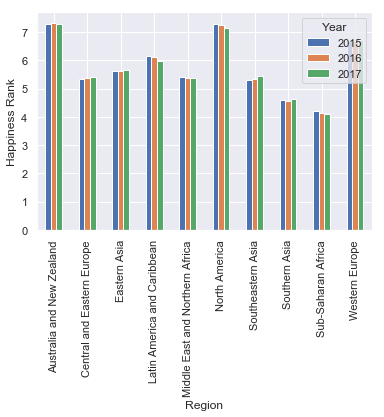

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()
pd.pivot_table(data, index= 'Region', columns= 'Year', values= "Happiness Score").plot(kind= 'bar')
plt.ylabel("Happiness Rank")

In [ ]:
The visual representation helps reveal that the differences are minor. 
Having said that, this also shows that there’s a permanent decrease
in the Happiness rank of both of the regions located in America.